In [1]:
# If this cell is giving you errors, double check that you have run the
# environment setup file to install all the required libraries AND you have
# restarted the kernel

from typing import List
from faker import Faker
import random, requests, json
import csv

# Philosophy
There may be times when you do not have data to work with (e.g., you are in the process of collecting data) but that does not mean that there is nothing to do. In many cases, you can set up the infrastructure and code so that things are ready to go when the data is ready. 

In order to prepare so that you are ready to go once the data collection is complete, you may have to do generate your own data.

This assignment is meant to give you some experience with creating a fake dataset.

# Domain
Consider the following (partial) database design for a university.

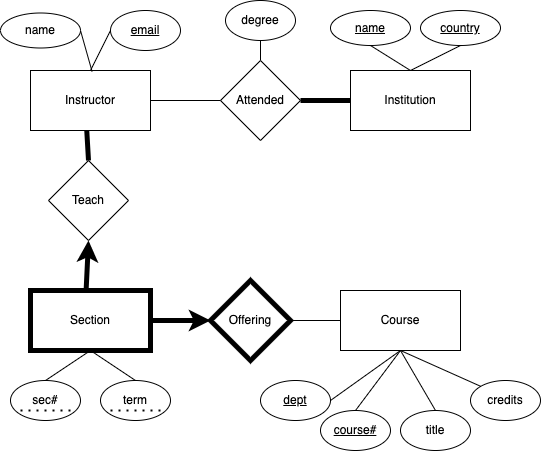

**This portion of the assignment will focus on the Instructor and Institution entity sets.**

# Step 1: Finding institutions around the world
Let's first consider how to find randomly generate information about institutions.

An API is a way for two computers to communicate with each other. You can think of an API call as a type of function call. You don't need to know *how* it does something - you just need to know how to call it.

Consider [this API](https://github.com/Hipo/university-domains-list-api) which allows you to access a list of universities from around the world.

In [2]:
# Try running this code snippet

response = requests.get('http://universities.hipolabs.com/search?name=university').json()

The `response` variable now holds information about post-secondary institutions around the world. It is a list that contains dictionaries where each dictionary contains information about a specific institution.

In the following cell, write some code that sorts the post-secondary institutions by country. That is, you should end up with a dictionary where **the key is the name of the institution location** (you can also use the `alpha_two_code` if you wish) and **the value is a list of strings where each string is the name of a university**. Some starter code is given below.

In [3]:
# Put your solution to step 1 here

# sorts post-secondary instituion by country and returns dict
# key is name of insitution location
# vaue is list of strings, where each is name of a university
def organize_institutions():
    # store the response in list of dict (information of institution)
    all_institutions = requests.get('http://universities.hipolabs.com/search?name=university').json()
    # pre-allocate dict to store output
    organized_institutions = {}
    
    # replace string (some uni contain strange values of name)
    rep = "\u200b"
    
    # loop through all dictionary of instituion to sort it by location
    for d in all_institutions:
        country = d["country"]
        uni = d["name"]
        # checks for the replace string define earlier
        if uni.__contains__(rep):
            uni = uni.replace(rep,"")
        # case 1, if country is not in the output dict yet
        if country not in organized_institutions.keys(): 
            organized_institutions[country] = [uni]
        # case 2, if country is already in the dict
        else:
            organized_institutions[country].append(uni)
    return organized_institutions

# Step 2: Data Cleaning
Did you notice something strange about some of the names of the universities? They have a `\u200b` included after a dash. This is caused by the way computers store values. 

Sometimes the data that you get is not "clean". That is, it has issues which affect its correctness. Let's fix this by editing our code above to remove occurrences of `\u200b` in institution names.

**Hint**: There are lots of ways to manipulate strings. Some of the most common methods include ways to [replace or substitute substrings](https://realpython.com/replace-string-python).

# Step 3: Finding a random institution
As a data scientist, you will be using data to help draw conclusions and guide decisions for various organizations. In order to draw conclusions that are fair, you **need** to ensure that the data you work with is representative of the population. It would be unethical for you to do otherwise (not to mention, it would also lead to false conclusions).

When generating fake data for instructors, part of the consideration we need to give is how to include different types of institutions. For example, if you only test with data from Canada and the US, your code might fail for institutions based in countries where English is not the official language. What if an institution name uses an accented letter? Your code (and your database configuration) might fail.

We will come back to this idea of representation in our data in Step 4/5. 

For now, let's focus on writing code to enable us to pick an institution name from a given country **at random**. Your code should be able to reasonably handle the case where we do not have institution information for the given country.

**Hint**: The [random library](https://docs.python.org/3/library/random.html) (specifically the [random integer](https://docs.python.org/3/library/random.html#functions-for-integers) and [random sequence](https://docs.python.org/3/library/random.html#functions-for-sequences) sections) may be helpful.

In [4]:
# Use a global variable to store info so that we can 
# avoid having to call the API multiple times
# Run this cell once and you can use ALL_INSTITUTIONS in the cells below
ALL_INSTITUTIONS = organize_institutions()

In [5]:
# Put your solution to step 3 here

# Pick institution name from given country at random
# So takes country you like, and returns random institution name
def random_country(country):
    countries = ALL_INSTITUTIONS.keys()
    if country in countries:
        return random.choice(ALL_INSTITUTIONS[country])
    else:
        print("The given country is not in the list of institutions, try again")

In [19]:
random_country("Canada")

'Victoria University Toronto, University of Toronto'

# Step 4: Representation in data
There are many different ways to divide the countries in the world. For example, you could use continents ([though the actual number of continents may not be what you think it is](https://www.youtube.com/watch?v=3uBcq1x7P34)). You can use criteria like a country's official language (though countries with more than one official language may present a grouping problem). You can also use political groupings such as countries that participate in a particular treaty (but do keep in mind this is a computer science class and not a political science one). 

Given we are trying to generate institution names to test our database configuration along with any code we write, what should factors should we consider when ensuring representation in our data?

Known that these institution names might share common country in which they are located, we should consider data structures that could effectively represent data and save memory space at the same time, for example, we could have key-value pairs, whereas key is the shared attribute and value is just the institutions itself. Moreover, how we choose to separate these natural grouping is very important if we wanted another level of grouping, i.e. dividing some countries by religion, area. But, this could be a delicate topic to mention by its nature of controversy. In a more coding perspective, we at least know that `institutions` and `country` could be represented as strings, or `chr` in SQL database, and to effectively use ER relations, we could make a `country` as unique key to identify a list of institutions that belong to this `country`. In short, right data type, right relation between entity/attribute that minimizes chances of having duplicated info are important factors to consider.

# Step 5: Using Faker

[Faker](https://faker.readthedocs.io) is a library that can be used to randomly generate values to create fake datasets. We will be using this library to generate things like fake names, emails, etc.

Write a function that accepts the name of a country (or a country code if you used country code as a key above) and generates a **list of strings** that contains the following:
* a name (both first and last)
* an email address
* a degree which can be a Masters or a PhD
    * pick the degree randomly
* an institution name (the institution must be from the given country - use the function you wrote in Step 3!)
* an institution country

We are essentially generating the information related to a single instructor. (Yes,  someone could have attended multiple institutions but we'll deal with this in part 2 of this assignment.)

In [26]:
# Write your solution to step 5 here

# Given country name
# generates first, last name, email, degree of Master/PHD (by random)
# Institution name of the country
# Institution country
def gen_fake_dat(country):
    # generate faker
    fake = Faker()
    out = {}
    # generates the names
    first = fake.first_name()
    last = fake.last_name()
    
    # Appending to the output dictionary
    out["Email"] = f"{last}@{fake.domain_name()}"
    out["Name"] = f"{first + ' ' + last}"
    out["Degree"] = random.choice(["Master", "PhD"])
    out["Institution Name"] = random_country(country)
    out["Institution Country"] = country
    return out
gen_fake_dat("Canada")

{'Email': 'Harris@rogers.com',
 'Name': 'Shawn Harris',
 'Degree': 'PhD',
 'Institution Name': 'University of British Columbia',
 'Institution Country': 'Canada'}

# Step 6: Write this to file
Let's write our data to file.

Your final CSV file should have a structure that looks like this:

| Email | Name | Degree | InstitutionName | InstitutionCountry |
|-|-|-|-|-|
| jing@ubc.ca | Jing Amari | PhD | UNICAMP Universidade Estadual de Campinas | Brazil |

Write a function that accepts an integer and produces a CSV file with that number of rows of instructor data. You can write helper functions if necessary.

As we discussed earlier, creating representative data is a hard problem. In this assignment, we have come up with a crude (and not-very-effective) grouping of countries. Countries should be chosen at random from each group and each group should have a roughly equal proportion of rows in the file.

We have provided a template of a read/write function below. Feel free to modify/delete the given code. Be sure to reuse your solution(s) to previous steps in this question.

Some resources:
* https://docs.python.org/3/library/csv.html
* https://docs.python.org/3/tutorial/inputoutput.html
* https://www.w3schools.com/python/python_file_write.asp

*Something to consider*: Given email is the primary key of Instructor, we need to ensure that all emails are unique. How can you ensure that this is true? What kind of data structure can you use to hold this information? 

In [27]:
# Here is a grouping of countries that we randomly generated
# These are global variables so you can directly reference this variable in the cells below
GROUP1 = ['Germany', 'Nigeria', 'Austria', 'Georgia', 'Jordan', 'Lebanon', 'Libya', 'Indonesia', 'Jamaica', 'Mexico', 'Morocco', 'Belarus', 'Belize', 'Puerto Rico', 'Turkey', 'Singapore', 'South Africa', 'Rwanda', 'Greenland', 'Faroe Islands', 'Tunisia']
GROUP2 = ['Bangladesh', 'Thailand', 'United Arab Emirates', 'Gambia', 'Grenada', 'Guyana', 'Korea, Republic of', 'Kazakhstan', 'Kenya', "Korea, Democratic People's Republic of", 'Finland', 'Ethiopia', 'Israel', 'Ireland', 'Panama', 'Belgium', 'Bhutan', 'Benin', 'Canada', 'Burundi', 'Cambodia', 'Denmark', 'Antigua and Barbuda', 'Qatar', 'Sri Lanka', 'Somalia', 'Sweden', 'Uganda', 'Turks and Caicos Islands', 'Tanzania, United Republic of', 'South Sudan', 'Seychelles', 'San Marino']
GROUP3 = ['United States', 'France', 'Greece', 'Italy', 'Hong Kong', 'Maldives', 'Kyrgyzstan', 'Oman', 'Namibia', 'Botswana', 'Bulgaria', 'Cameroon', 'Dominica', 'Albania', 'Azerbaijan', 'Bahrain', 'Viet Nam', 'Zambia', 'Portugal', 'Serbia', 'Syrian Arab Republic', 'Samoa', 'Guam', 'Malta', 'Virgin Islands, British', 'Brunei Darussalam', 'Swaziland']
GROUP4 = ['Malaysia', 'Kuwait', 'Pakistan', 'Iran', 'Philippines', 'Spain', "Lao People's Democratic Republic", 'North Macedonia', 'Lesotho', 'Fiji', 'Norway', 'Mongolia', 'Moldova, Republic of', 'Cyprus', 'Czech Republic', 'Russian Federation', 'Slovakia', 'Tajikistan', 'Ukraine', 'Saint Kitts and Nevis', 'Saint Vincent and the Grenadines', 'Saudi Arabia', 'Uzbekistan', 'Macao', 'New Caledonia', 'Solomon Islands']
GROUP5 = ['Japan', 'China', 'United Kingdom', 'Switzerland', 'Haiti', 'Latvia', 'Kosovo', 'Lithuania', 'Luxembourg', 'Egypt', 'Iceland', 'Iraq', 'Papua New Guinea', 'Nepal', 'New Zealand', 'Myanmar', 'Croatia', 'Sierra Leone', 'Sudan', 'Suriname', 'Congo', 'Trinidad and Tobago', 'Liberia', 'Monaco', 'Andorra']
GROUP6 = ['Poland', 'India', 'Taiwan', 'Hungary', 'Ghana', 'Malawi', 'Estonia', 'Palestine, State of', 'Niue', 'Netherlands', 'Bosnia and Herzegovina', 'Cayman Islands', 'Afghanistan', 'Armenia', 'Australia', 'Romania', 'Zimbabwe', 'Yemen', 'Turkmenistan', 'Saint Lucia', 'Costa Rica', 'Mauritius', 'Slovenia', 'Montenegro', 'Barbados', 'Tonga', 'Montserrat']

In [28]:
ALL_GROUPS = [GROUP1, GROUP2, GROUP3, GROUP4, GROUP5, GROUP6]

In [29]:
groups = {1: GROUP1,
          2: GROUP2,
          3: GROUP3,
          4: GROUP4,
          5: GROUP5,
          6: GROUP6
         }

In [41]:
# Write your solution to step 4 here

# Accepts integer and produces a CSV file of that number of rows of data

# Template 1: Uses the CSV library
def write_dataset_to_file(output_dataset_filename, num_rows_to_produce):
    """
    Writes the data to a file with a name specified by output_dataset_filename
    """
    with open(output_dataset_filename, mode='w') as fn:
        writer = csv.writer(fn, delimiter=',')
        
        # This writes the header (the row with the column titles) into the CSV
        writer.writerow(["Email", "Name", "Degree", "Institution Name", "Institution Country"])
        
        # TODO Complete the rest of the function
        if num_rows_to_produce % 6 == 0:
            for i in range(num_rows_to_produce):
                for index, group in groups.items():
                    country = random.choice(group)
                    dat = gen_fake_dat(country=country).values()
                    writer.writerow(dat)

In [37]:
# Calling the function to test its functionality
path = "data/testing.csv"
write_dataset_to_file(path, 3)

# Submitting Your Work
Once you are finished with the assignment, download the file by going to File -> Download As -> Notebook (.ipynb). This will allow you to save the file to a local location on your computer. You can then upload the file to Canvas.